# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Горохов Кирилл Игоревич БФИ2002
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [3]:
import networkx as nx
import matplotlib.pyplot as plt 
import copy
import math
import pandas as pd
import random
import time

In [4]:
def create_g(matrix):
    g = nx.DiGraph()
    for i in range(1, len(matrix)):
        g.add_node(i)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf:
                g.add_edge(i+1, j+1, weight = matrix[i][j], label = matrix[i][j])
    return g

def draw_w(g, path):
    weights = nx.get_edge_attributes(G, 'weight')
    edges = [(a,b) for a,b in zip(path, path[1:])]
    pos = nx.circular_layout(g)
    nx.draw_networkx(g, pos=pos)
    nx.draw_networkx_edge_labels(G, pos = pos, edge_labels=weights)
    nx.draw_networkx_edges(g, pos=pos, edgelist = edges, edge_color="yellow", width=5 )
    
def mtrx_read(file):
    f = open(file,'r')
    matrix = [[int(num) for num in line.split()] for line in f]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
    f.close()
    return matrix

Начальная вершина: 1
Конечная вершина: 6
Путь:  [1, 4, 6]


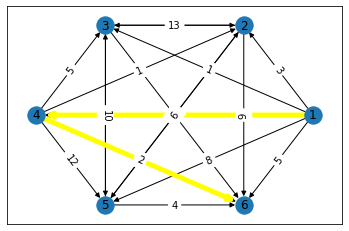

,Количество узлов графа,Время выполнения
0,10,1
1,15,1
2,25,3
3,35,10


In [5]:
#Алгоритм Флойда-Уоршелла

def get_path(path, start, end):
    start -= 1
    end -= 1
    result = []
    result.append(start)
    while start != end:
        start = path[start][end]
        result.append(start)
    result = [el + 1 for el in result]
    return result

def FloydWarshall(matrix):
    path = [[0 for i in range(len(matrix))] for j in range(len(matrix))]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf:
                path[i][j] = j      
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i == j: continue
            if matrix[i][j] != math.inf:
                for k in range(len(matrix)):
                    if i == k or j == k: continue
                    if matrix[i][k] > matrix[i][j] + matrix[j][k]:
                        matrix[i][k] = matrix[i][j] + matrix[j][k]
                        path[i][k] = path[i][j]
    return (path, matrix)

matrix = mtrx_read('matrix.txt')

start = int(input('Начальная вершина: '))
end = int(input('Конечная вершина: '))

result = FloydWarshall(matrix)
path = get_path(result[0], start, end)
print('Путь: ', path)

G = create_g(matrix)
draw_w(G, path)
plt.show()

m1 = mtrx_read('m1.txt')
m2 = mtrx_read('m2.txt')
m3 = mtrx_read('m3.txt')
m4 = mtrx_read('m4.txt')
results = []
            
time1 = time.time()
res = FloydWarshall(m1)
time2 = time.time()
t1 = round((time2 - time1)*1000)

time1 = time.time()
res = FloydWarshall(m2)
time2 = time.time()
t2 = round((time2 - time1)*1000)

time1 = time.time()
res = FloydWarshall(m3)
time2 = time.time()
t3= round((time2 - time1)*1000)

time1 = time.time()
res = FloydWarshall(m4)
time2 = time.time()
t4 = round((time2 - time1)*1000)

results = [[10, t1], [15, t2], [25, t3], [35, t4]]

pd.DataFrame(results, columns = ["Количество узлов графа", "Время выполнения"])

Начальная вершина: 1
Конечная вершина: 6
Путь:  [1, 4, 6]


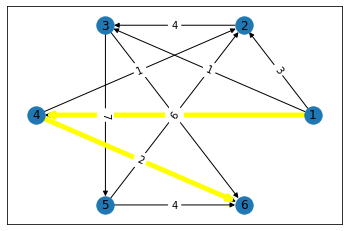

,Количество узлов графа,Время выполнения
0,10,1
1,15,0
2,25,0
3,35,0


In [6]:
#Алгоритм Дейкстры

def Dijkstra(matrix, start, end):
    mtrx = copy.deepcopy(matrix)
    n = len(mtrx)
    start -= 1
    end -= 1
    D = [mtrx[start][i] for i in range(n)] 
    D[start] = 0
    P = [[start] for i in range(n)]
    S = {start} 
    
    for i in range(n):
        min = math.inf 
        node = None
        for j in range(n):
            if D[j] < min and j not in S:
                min = D[j]
                node = j
                S.add(node)
        if node is not None:
            for k in range(n):
                if D[k] > mtrx[node][k] + D[node]:
                    D[k] = mtrx[node][k] + D[node]
                    P[k] = copy.deepcopy(P[node])
                    P[k].append(node)
        else:
            break  
    for i in range(n):
        if D[i] != math.inf and P[i][0] != i:
            P[i].append(i)   
    if D[end] == math.inf:
        path = []
    else:
        path = [el + 1 for el in P[end]]
    return (D, path, P)

matrix = mtrx_read('matrix.txt')

start = int(input('Начальная вершина: '))
end = int(input('Конечная вершина: '))

result = Dijkstra(matrix, start, end)
path = result[1]
print('Путь: ', path)

G = create_g(matrix)
draw_w(G, path)
plt.show()

m1 = mtrx_read('m1.txt')
m2 = mtrx_read('m2.txt')
m3 = mtrx_read('m3.txt')
m4 = mtrx_read('m4.txt')
results = []
            
time1 = time.time()
res = Dijkstra(m1, 1, 7)
time2 = time.time()
t1 = round((time2 - time1)*1000)

time1 = time.time()
res = Dijkstra(m1, 1, 7)
time2 = time.time()
t2 = round((time2 - time1)*1000)

time1 = time.time()
res = Dijkstra(m1, 1, 7)
time2 = time.time()
t3= round((time2 - time1)*1000)

time1 = time.time()
res = Dijkstra(m1, 1, 7)
time2 = time.time()
t4 = round((time2 - time1)*1000)

results = [[10, t1], [15, t2], [25, t3], [35, t4]]

pd.DataFrame(results, columns = ["Количество узлов графа", "Время выполнения"])

[[inf, 3, 1, 3, inf, inf], [inf, inf, 4, inf, inf, inf], [inf, inf, inf, inf, 7, 5], [inf, 1, inf, inf, inf, 2], [inf, 6, inf, inf, inf, 4], [inf, inf, inf, inf, inf, inf]]
Начальная вершина: 2
Конечная вершина: 5
Путь:  [2, 3, 5]


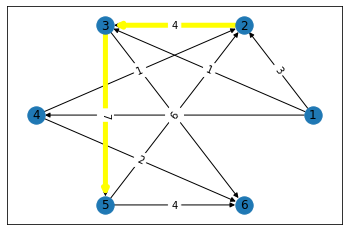

,Количество узлов графа,Время выполнения
0,10,0
1,15,1
2,25,1
3,35,1


In [7]:
# Алгоритм Беллмана-Форда

def BellmanFord(matrix, start, end):
    mtrx = copy.deepcopy(matrix)
    n = len(mtrx)
    start -= 1
    end -= 1
    A = [[math.inf for i in range(n)] for j in range(n)] 
    A[0][start] = 0
    P = [[start] for i in range(n)]
    for k in range(1, n):
        A[k] = copy.deepcopy(A[k - 1])
        for i in range(n):
            for j in range(n):
                if mtrx[i][j] != math.inf:    
                    if A[k][j] > A[k-1][i] + mtrx[i][j]:
                        A[k][j] = A[k-1][i] + mtrx[i][j]
                        P[j] = copy.deepcopy(P[i])
                        P[j].append(j)
    
    if A[-1][end] == math.inf:
        path = []
    else:
        path = [el + 1 for el in P[end]]
    return (A[-1], path, P)

matrix = mtrx_read('matrix.txt')
print(matrix)

start = int(input('Начальная вершина: '))
end = int(input('Конечная вершина: '))
result = BellmanFord(matrix, start, end)
path = result[1]

print('Путь: ',path)

G = create_g(matrix)
draw_w(G, path)
plt.show()

m1 = mtrx_read('m1.txt')
m2 = mtrx_read('m2.txt')
m3 = mtrx_read('m3.txt')
m4 = mtrx_read('m4.txt')
results = []
            
time1 = time.time()
res = BellmanFord(m1, 2, 9)
time2 = time.time()
t1 = round((time2 - time1)*1000)

time1 = time.time()
res = BellmanFord(m1, 2, 9)
time2 = time.time()
t2 = round((time2 - time1)*1000)

time1 = time.time()
res = BellmanFord(m1, 2, 9)
time2 = time.time()
t3= round((time2 - time1)*1000)

time1 = time.time()
res = BellmanFord(m1, 2, 9)
time2 = time.time()
t4 = round((time2 - time1)*1000)

results = [[10, t1], [15, t2], [25, t3], [35, t4]]

pd.DataFrame(results, columns = ["Количество узлов графа", "Время выполнения"])

[[inf, 3, 1, 3, inf, inf], [inf, inf, 4, inf, inf, inf], [inf, inf, inf, inf, 7, 5], [inf, 1, inf, inf, inf, 2], [inf, 6, inf, inf, inf, 4], [inf, inf, inf, inf, inf, inf]]
Начальная вершина: 1
Конечная вершина: 6
Путь:  [1, 4, 6]


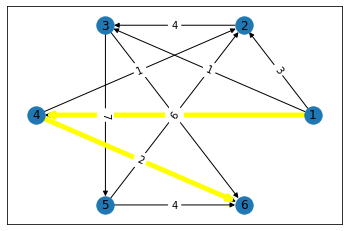

,Количество узлов графа,Время выполнения
0,10,4
1,15,3
2,25,3
3,35,4


In [8]:
#Алгоритм Джонсона
def Johnson(matrix, start, end):
    start -= 1
    end -= 1
    A = copy.deepcopy(matrix)
    M = copy.deepcopy(matrix)
    n = len(M)
    for i in range(n):
        A[i].append(math.inf)
    A.append([0 for i in range(n+1)])
    res = BellmanFord(A, n+1, 1)
    
    for i in range(n):
        for j in range(n):
            if M[i][j] != math.inf and res[0][i] != math.inf and res[0][j] != math.inf:
                M[i][j] += res[0][i] - res[0][j]
    D = []
    path = []
    for i in range(n):
        d = Dijkstra(M, i+1, i+1)
        D.append(d[0])
        path.append(d[2])
    for i in range(n):
        for j in range(n):
            if D[i][j] != math.inf and res[0][i] != math.inf and res[0][j] != math.inf:
                D[i][j] += res[0][j] - res[0][i]
    return (D, [el + 1 for el in path[start][end]], path)

matrix = mtrx_read('matrix.txt')
print(matrix)

start = int(input('Начальная вершина: '))
end = int(input('Конечная вершина: '))

result = Johnson(matrix, start, end)
path = result[1]
print('Путь: ',path)

G = create_g(matrix)
draw_w(G, path)
plt.show()

m1 = mtrx_read('m1.txt')
m2 = mtrx_read('m2.txt')
m3 = mtrx_read('m3.txt')
m4 = mtrx_read('m4.txt')
results = []
            
time1 = time.time()
res = Johnson(m1, 3, 10)
time2 = time.time()
t1 = round((time2 - time1)*1000)

time1 = time.time()
res = Johnson(m1, 3, 10)
time2 = time.time()
t2 = round((time2 - time1)*1000)

time1 = time.time()
res = Johnson(m1, 3, 10)
time2 = time.time()
t3= round((time2 - time1)*1000)

time1 = time.time()
res = Johnson(m1, 3, 10)
time2 = time.time()
t4 = round((time2 - time1)*1000)

results = [[10, t1], [15, t2], [25, t3], [35, t4]]

pd.DataFrame(results, columns = ["Количество узлов графа", "Время выполнения"])

[[inf, 3, 1, 3, inf, inf], [inf, inf, 4, inf, inf, inf], [inf, inf, inf, inf, 7, 5], [inf, 1, inf, inf, inf, 2], [inf, 6, inf, inf, inf, 4], [inf, inf, inf, inf, inf, inf]]
Начальная вершина: 2
Конечная вершина: 5
Путь:  [2, 3, 5]


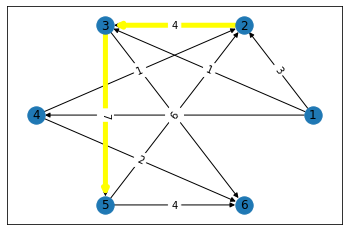

,Количество узлов графа,Время выполнения
0,10,0
1,15,1
2,25,0
3,35,1


In [9]:
#Алгоритм Левита
def Levita(matrix, start, end):
    mtrx = copy.deepcopy(matrix)
    start -= 1
    end -= 1
    n = len(mtrx)
    P = [[start] for i in range(n)] 
    D = [math.inf for i in range(n)] 
    D[start] = 0
    m0 = set() 
    m1 = {"main_queue" : [start], "priority_queue": []} 
    m2 = set(range(n)) 
    m2.remove(start)
    while len(m1["main_queue"]) or len(m1["priority_queue"]):
        if len(m1["priority_queue"]):
            cur_node = m1["priority_queue"].pop(0)
        else:
            cur_node = m1["main_queue"].pop(0)
        for temp_node in range(n):
            if D[temp_node] == math.inf and mtrx[cur_node][temp_node] == math.inf:
                continue
                
            if temp_node in m2:
                m2.remove(temp_node)
                distance = D[cur_node] + mtrx[cur_node][temp_node]
                if distance < D[temp_node]:
                    D[temp_node] = distance
                    P[temp_node] = copy.deepcopy(P[cur_node])
                    P[temp_node].append(temp_node)
                m1["main_queue"].append(temp_node)
            elif temp_node in m1["main_queue"] or temp_node in m1["priority_queue"]:
                distance = D[cur_node] + mtrx[cur_node][temp_node]
                if distance < D[temp_node]:
                    D[temp_node] = distance
                    P[temp_node] = copy.deepcopy(P[cur_node])
                    P[temp_node].append(temp_node)
            elif temp_node in m0 and D[temp_node] > D[cur_node] + mtrx[cur_node][temp_node]:
                m0.remove(temp_node)
                m1["priority_queue"].append(temp_node)
                distance = D[cur_node] + mtrx[cur_node][temp_node]
                if distance < D[temp_node]:
                    D[temp_node] = distance
                    P[temp_node] = copy.deepcopy(P[cur_node])
                    P[temp_node].append(temp_node)
        m0.add(cur_node)
    return D, [el + 1 for el in P[end]], P

matrix = mtrx_read('matrix.txt')
print(matrix)

start = int(input('Начальная вершина: '))
end = int(input('Конечная вершина: '))

result = Levita(matrix, start, end)
path = result[1]
print('Путь: ', path)

G = create_g(matrix)
draw_w(G, path)
plt.show()

m1 = mtrx_read('m1.txt')
m2 = mtrx_read('m2.txt')
m3 = mtrx_read('m3.txt')
m4 = mtrx_read('m4.txt')
results = []
            
time1 = time.time()
res = Levita(m1, 3, 10)
time2 = time.time()
t1 = round((time2 - time1)*1000)

time1 = time.time()
res = Levita(m1, 3, 10)
time2 = time.time()
t2 = round((time2 - time1)*1000)

time1 = time.time()
res = Levita(m1, 3, 10)
time2 = time.time()
t3= round((time2 - time1)*1000)

time1 = time.time()
res = Levita(m1, 3, 10)
time2 = time.time()
t4 = round((time2 - time1)*1000)

results = [[10, t1], [15, t2], [25, t3], [35, t4]]

pd.DataFrame(results, columns = ["Количество узлов графа", "Время выполнения"])

[[inf, 3, 1, 3, inf, inf], [inf, inf, 4, inf, inf, inf], [inf, inf, inf, inf, 7, 5], [inf, 1, inf, inf, inf, 2], [inf, 6, inf, inf, inf, 4], [inf, inf, inf, inf, inf, inf]]
Начальная вершина: 1
Конечная вершина: 6
[1, 4, 6]


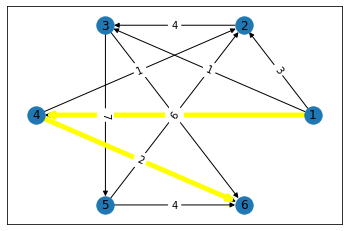

[1, 3, 6]


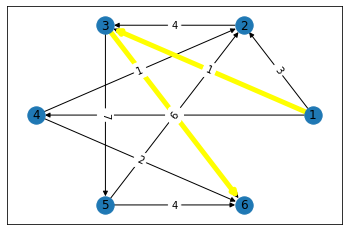

In [16]:
#Алгорит Йена
def Yen(mtrx, v, u, K):
    v -= 1
    u -= 1
    matrix = copy.deepcopy(mtrx)
    N = len(matrix)
    temp = Dijkstra(matrix, v + 1, u + 1)
    candidates = set()
    paths = [[el - 1 for el in temp[1]]]
    lengths = [temp[0][u]]
    if len(paths[0]) < 2:
        return ([], [])
    for k in range (1, K):
        cur_mat = copy.deepcopy(matrix)
        for i in range(len(paths[-1]) - 1):
            spur_node = paths[-1][i]
            root_path = paths[-1][:i + 1]
            
            for path in paths:
                if root_path == path[:i + 1]:
                    cur_mat[path[i]][path[i + 1]] = math.inf
            
            for node in root_path:
                if node != spur_node:
                    cur_mat[node] = [math.inf for j in range(N)]
            
            temp = Dijkstra(cur_mat, spur_node + 1, u + 1)
            spur_path = [el - 1 for el in temp[1][1:]]
            if len(spur_path) < 1:
                continue
            
            total_path = root_path
            total_path.extend(spur_path)
            total_path = tuple(total_path)
            distance = 0
            for j in range(1, len(total_path)):
                distance += matrix[total_path[j - 1]][total_path[j]]

            candidates.add((total_path, distance))
        if len(candidates) == 0:
            break
        
        sorted_candidates = list(candidates)
        sorted_candidates.sort(key = lambda x : x[1])
        paths.append(list(sorted_candidates[0][0]))
        lengths.append(sorted_candidates[0][1])
        candidates.remove(sorted_candidates[0])
    for i in range(len(paths)):
        paths[i] = [el + 1 for el in paths[i]]
    return (paths, lengths)

matrix = mtrx_read('matrix.txt')
print(matrix)

start = int(input('Начальная вершина: '))
end = int(input('Конечная вершина: '))

result = Yen(matrix, start, end, 2)
paths = result[0]   

m1 = mtrx_read('m1.txt')
m2 = mtrx_read('m2.txt')
m3 = mtrx_read('m3.txt')
m4 = mtrx_read('m4.txt')
results = []

time1 = time.time()
res = Yen(m1, 1, 6, 1)
time2 = time.time()
t1 = round((time2 - time1)*1000)

time1 = time.time()
res = Yen(m1, 1, 6, 1)
time2 = time.time()
t2 = round((time2 - time1)*1000)

time1 = time.time()
res = Yen(m1, 1, 6, 1)
time2 = time.time()
t3= round((time2 - time1)*1000)

time1 = time.time()
res = Yen(m1, 1, 6, 1)
time2 = time.time()
t4 = round((time2 - time1)*1000)

results = [[10, t1], [15, t2], [25, t3], [35, t4]]
pd.DataFrame(results, columns = ["Количество узлов графа", "Время выполнения"])

for i in range(len(paths)):
    path = paths[i]
    print(path)
    G = create_g(matrix)
    draw_w(G, path)
    plt.show()

### Вывод

In [ ]:
В ходе выполнения лабораторной работы № 6 были реализованы различные алгоритмы поиска кратчайшего расстояния между двумя вершинами графа, а также была вычислена временная сложность работы алгоритма в зависимости от числа узлов